# **Computational Drug Discovery - Regression Random Forest**

In **Part 4**, I will be building a regression model of sodium/glucose cotransporter 2 (SGLT2) inhibitors using the random forest algorithm.

---

## **1. Import libraries**

In [4]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

## **2. Load the dataset**

In [ ]:
df = pd.read_csv('../data/SGLT2_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
df = df[df['pIC50'].notnull()] #to drop missing pIC50 values
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.958607
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.308919
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.339135
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.274088
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.122629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.508638
1294,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.744727
1295,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.677781
1296,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.128427


## **3. Input features**
The ***SGLT2*** dataset contains 882 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [ ]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1294,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1295,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1296,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [ ]:
Y = df.pIC50
Y

0       7.958607
1       6.308919
2       6.339135
3       6.274088
4       6.122629
          ...   
1293    8.508638
1294    8.744727
1295    8.677781
1296    8.128427
1297    8.841638
Name: pIC50, Length: 1298, dtype: float64

### **3.3. Let's examine the data dimension**

In [ ]:
X.shape

(1298, 881)

In [ ]:
Y.shape

(1298,)

### **3.4. Remove low variance features**

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [ ]:
X.shape

(1298, 129)

## **4. Data split (80/20 ratio)**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train.shape, Y_train.shape

((1038, 129), (1038,))

In [ ]:
X_test.shape, Y_test.shape

((260, 129), (260,))

## **5. Building a regression model using random forest**

In [ ]:
import numpy as np
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.16664108957645885

In [ ]:
Y_pred = model.predict(X_test)

## **6. Scatter plot of Experimental vs Predicted pIC50 values**

<function matplotlib.pyplot.show(close=None, block=None)>

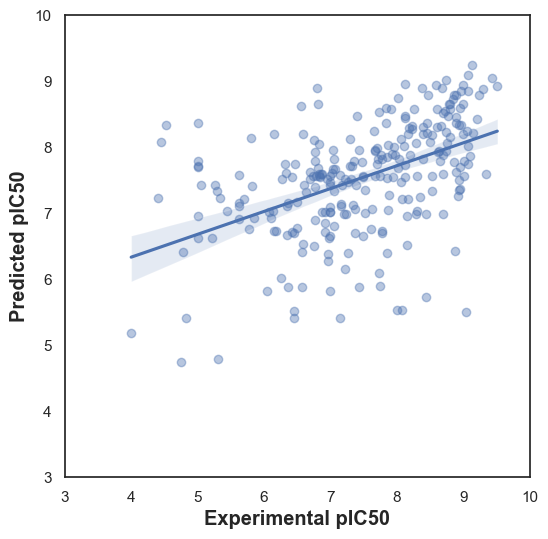

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(3, 10)
ax.set_ylim(3, 10)
ax.figure.set_size_inches(6, 6)
plt.show